In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((5,19),-np.inf,dtype=object)

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0886040401_M268grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.882e-03 +/- 4.786e-04 (64.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 2.139e+04 sec
 Using fit statistic: chi
 Using Background File                0886040401_M268spec_bkg.fits
  Background Exposure Time: 2.139e+04 sec
 Using Response (RMF) File            0886040401_M268spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886040401_M268spec.arf



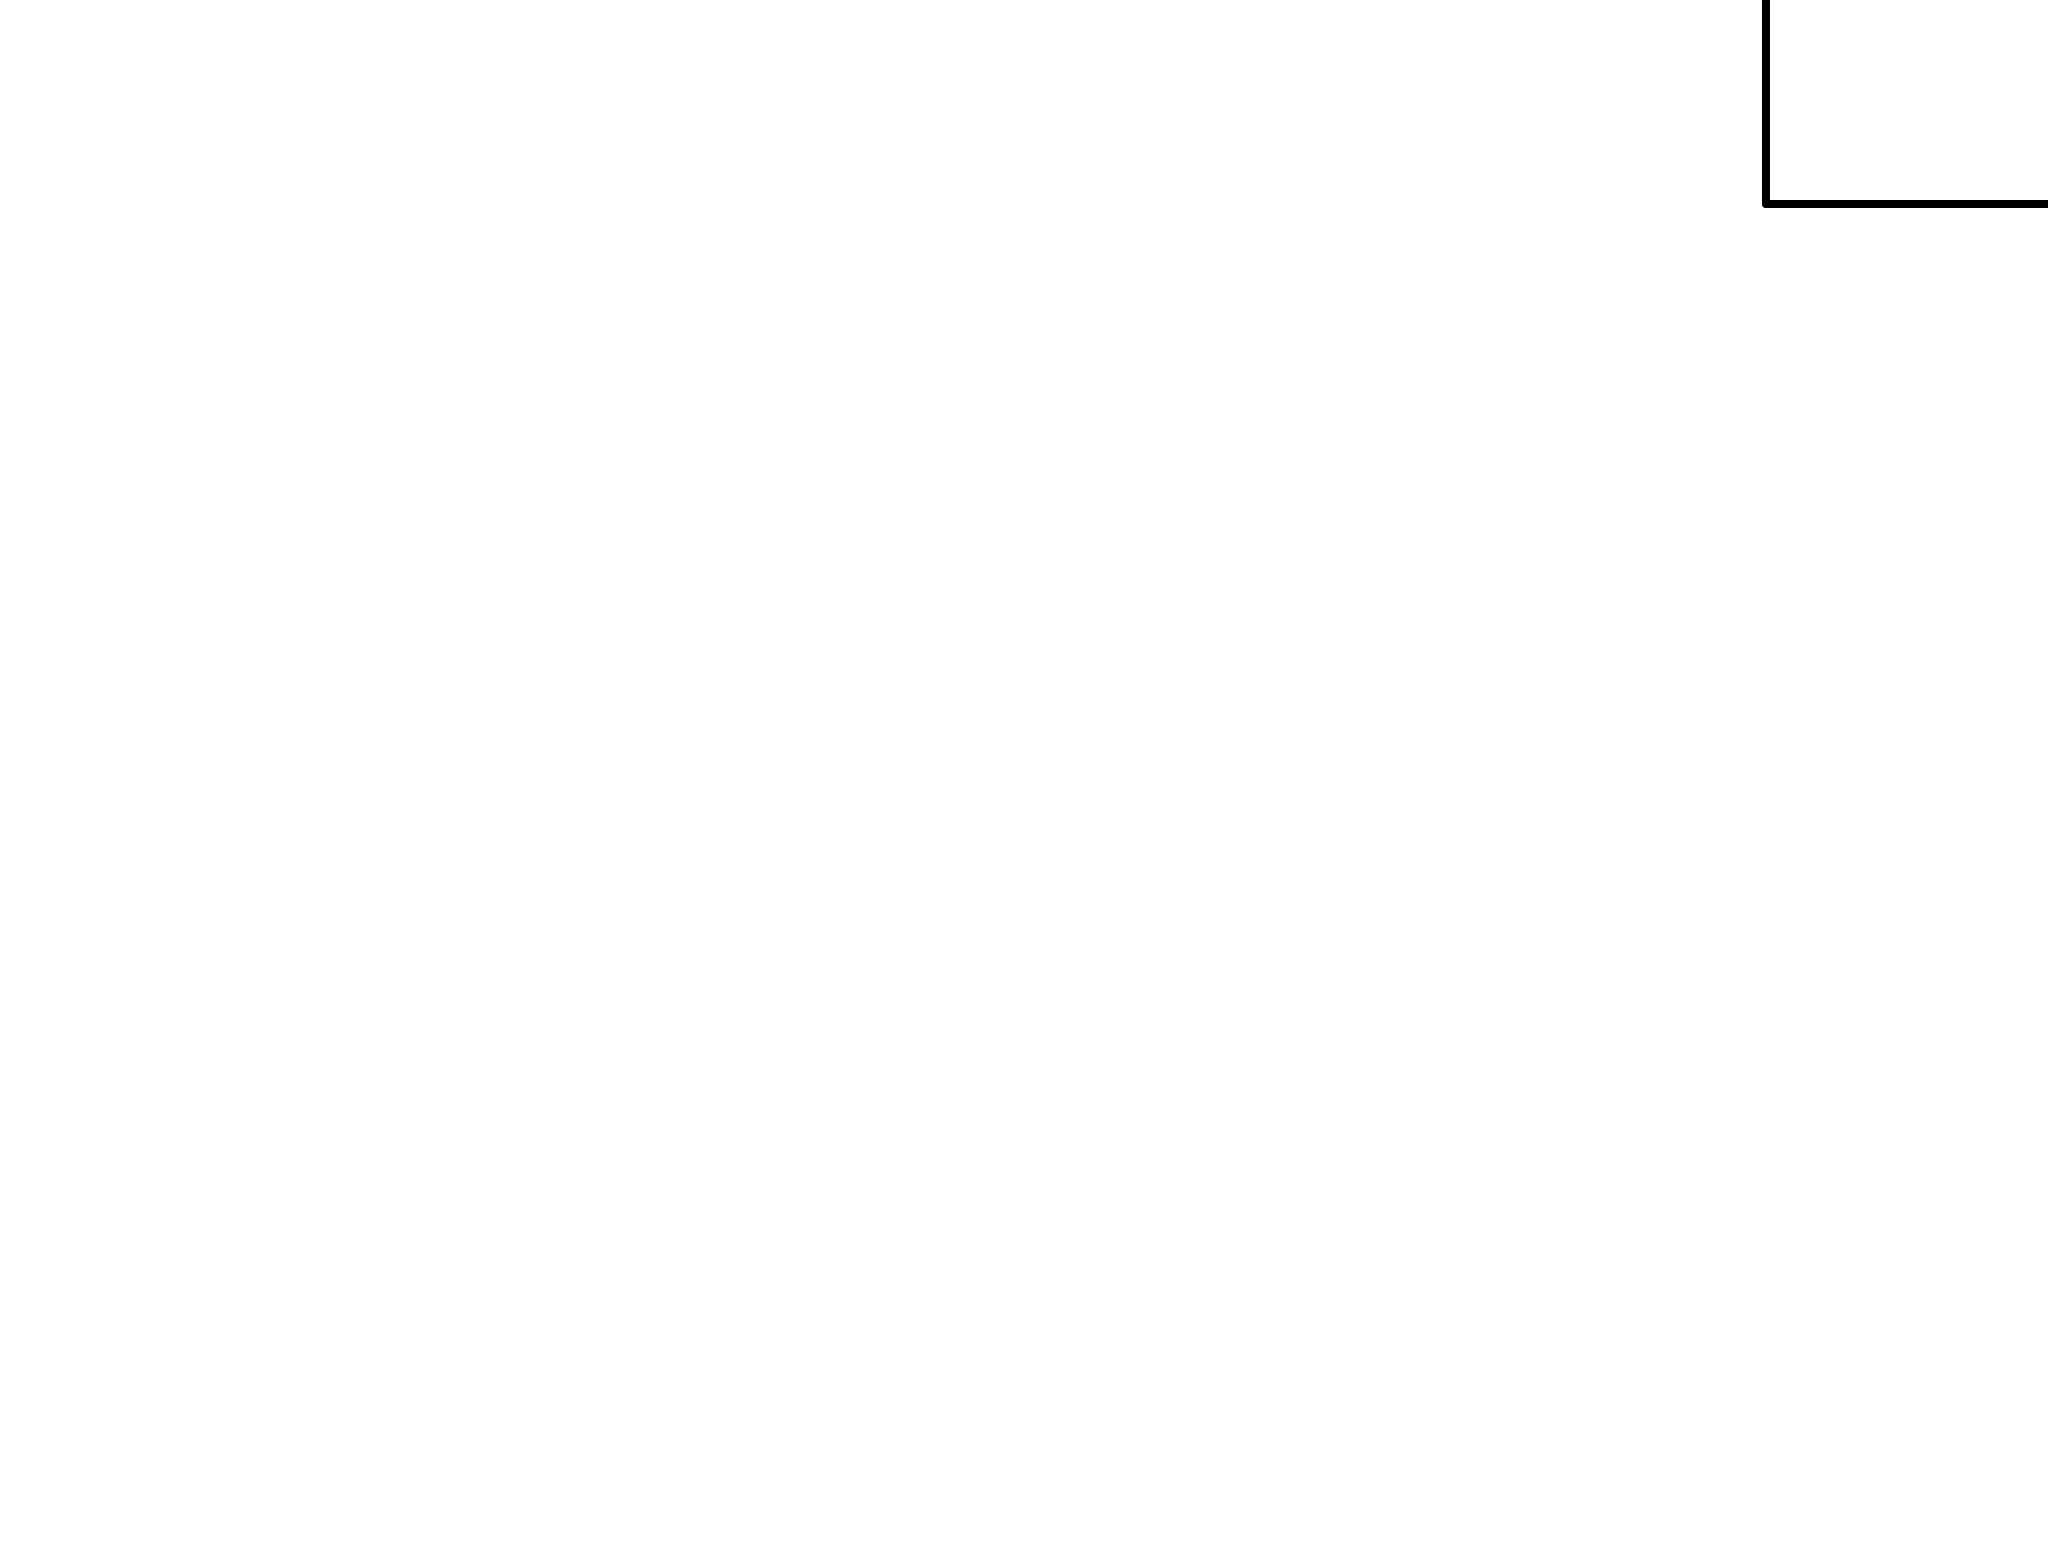

In [3]:
spec_fnames = glob.glob('*grpspec.fits')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

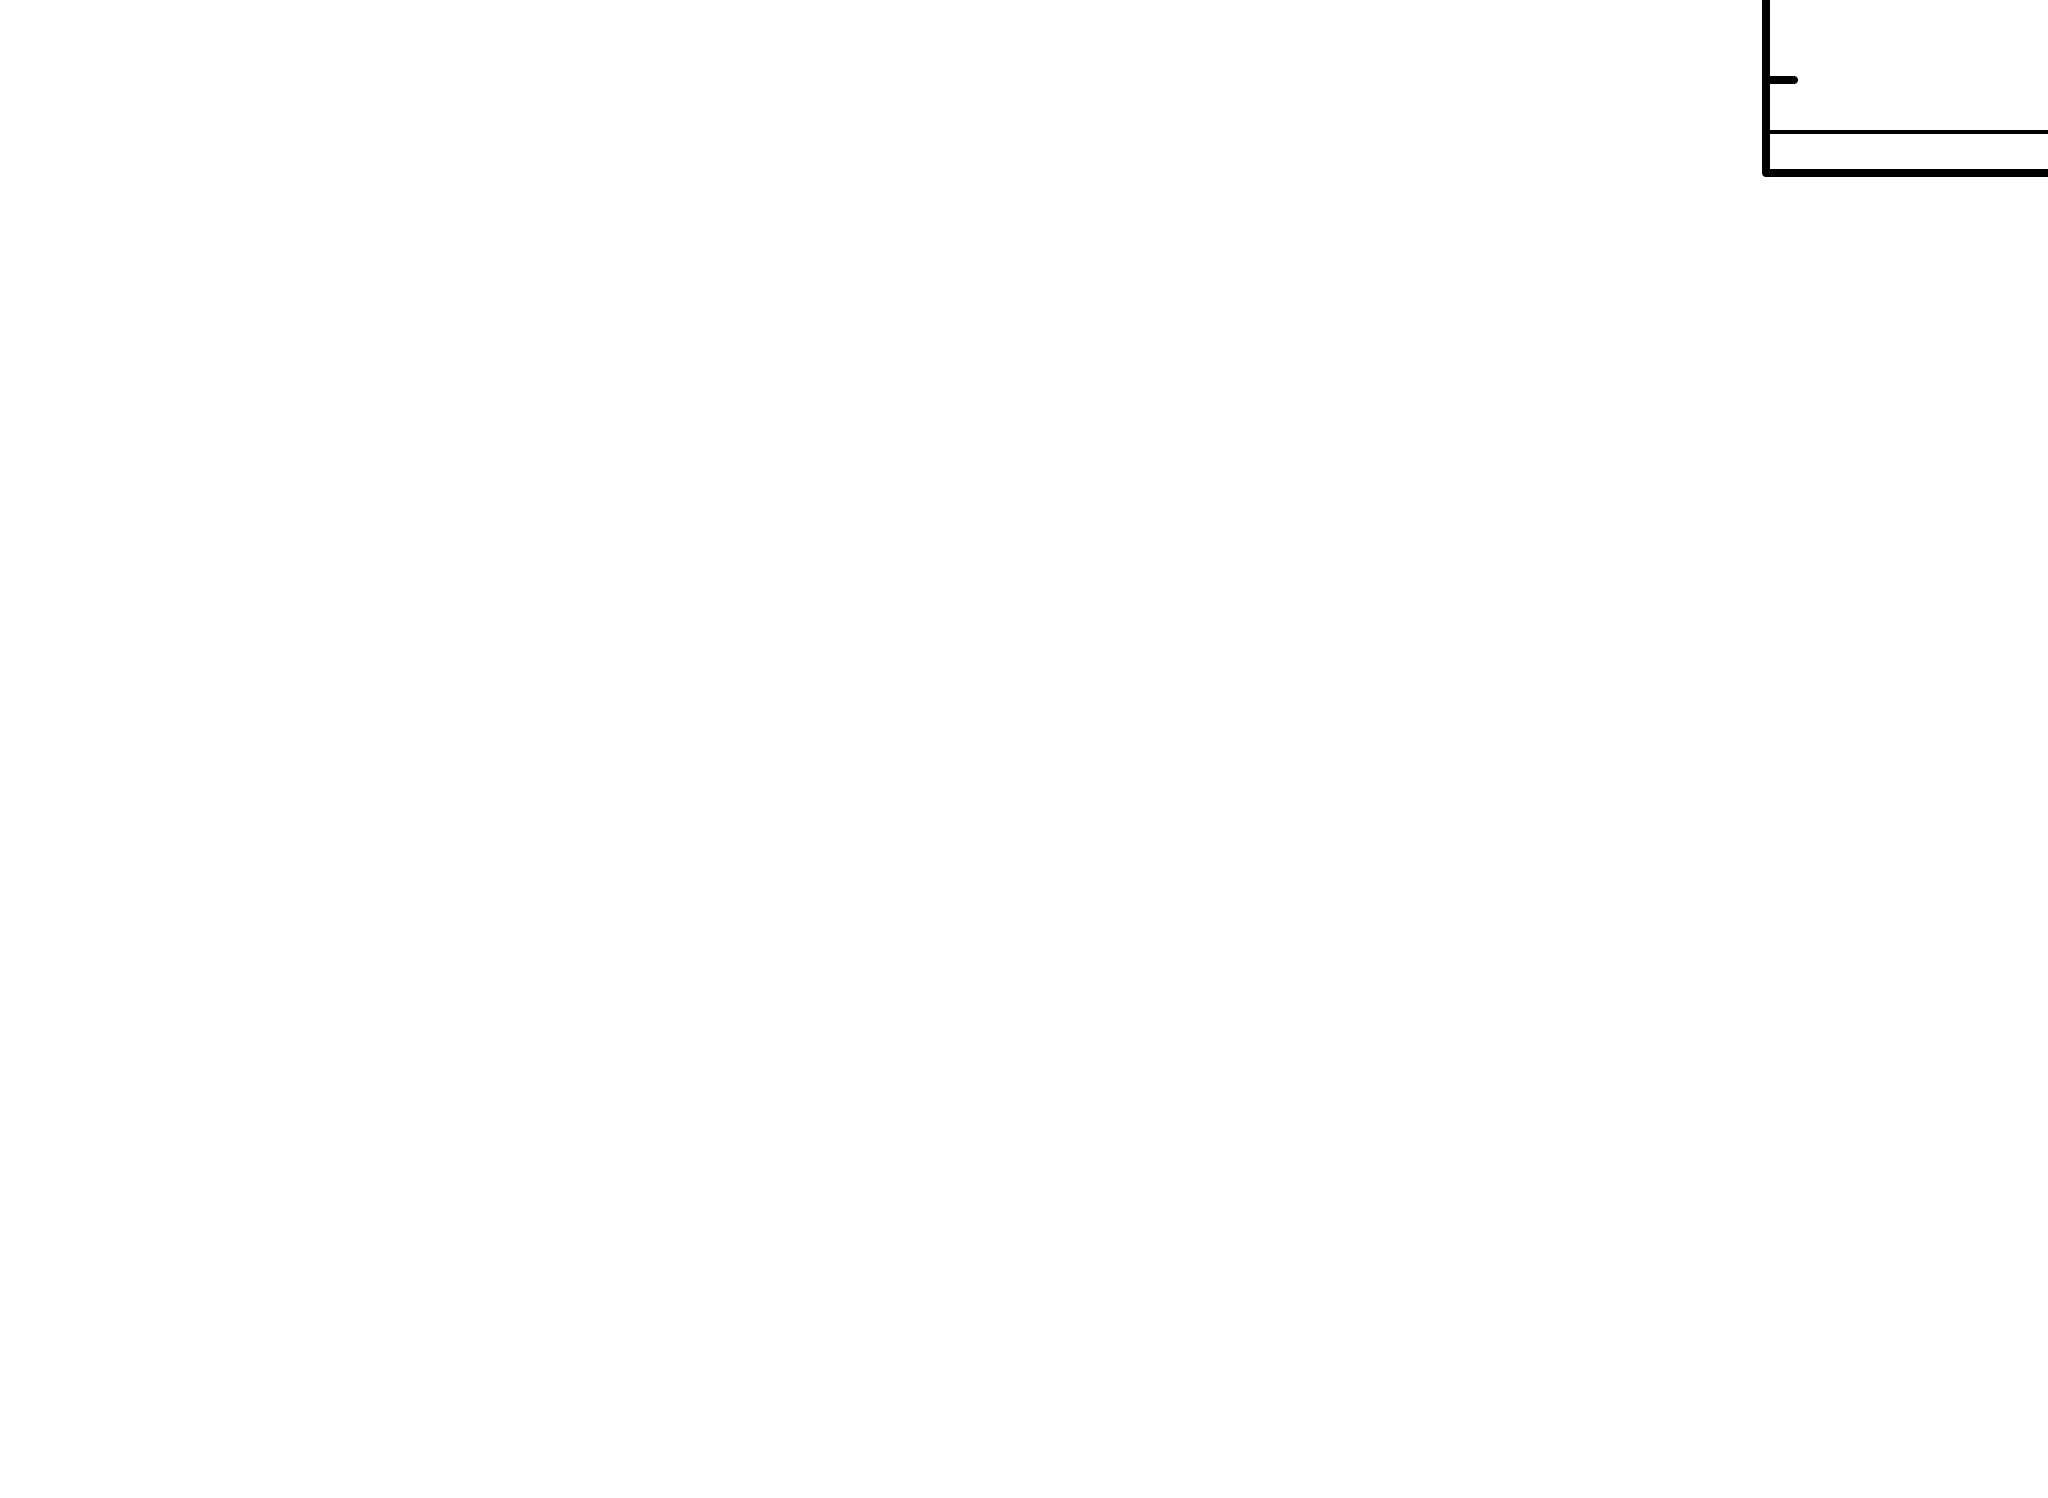

In [4]:
spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
# Fit.error("1")
# Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[0,4:7] = mo.bbody.kT.values[0], np.inf, np.inf
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof



Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.133471e+11     using 5 bins.

Test statistic : Chi-Squared              2.133471e+11     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
4.49851      0.350124     -2       1.73987       1.41481   2.11671e-05
3.75229      69886.6      -2       1.97753       1.61538   3.07004e-05
3.63374      24414.5      -3       2.25065       1.82739   4.21542e-05
3

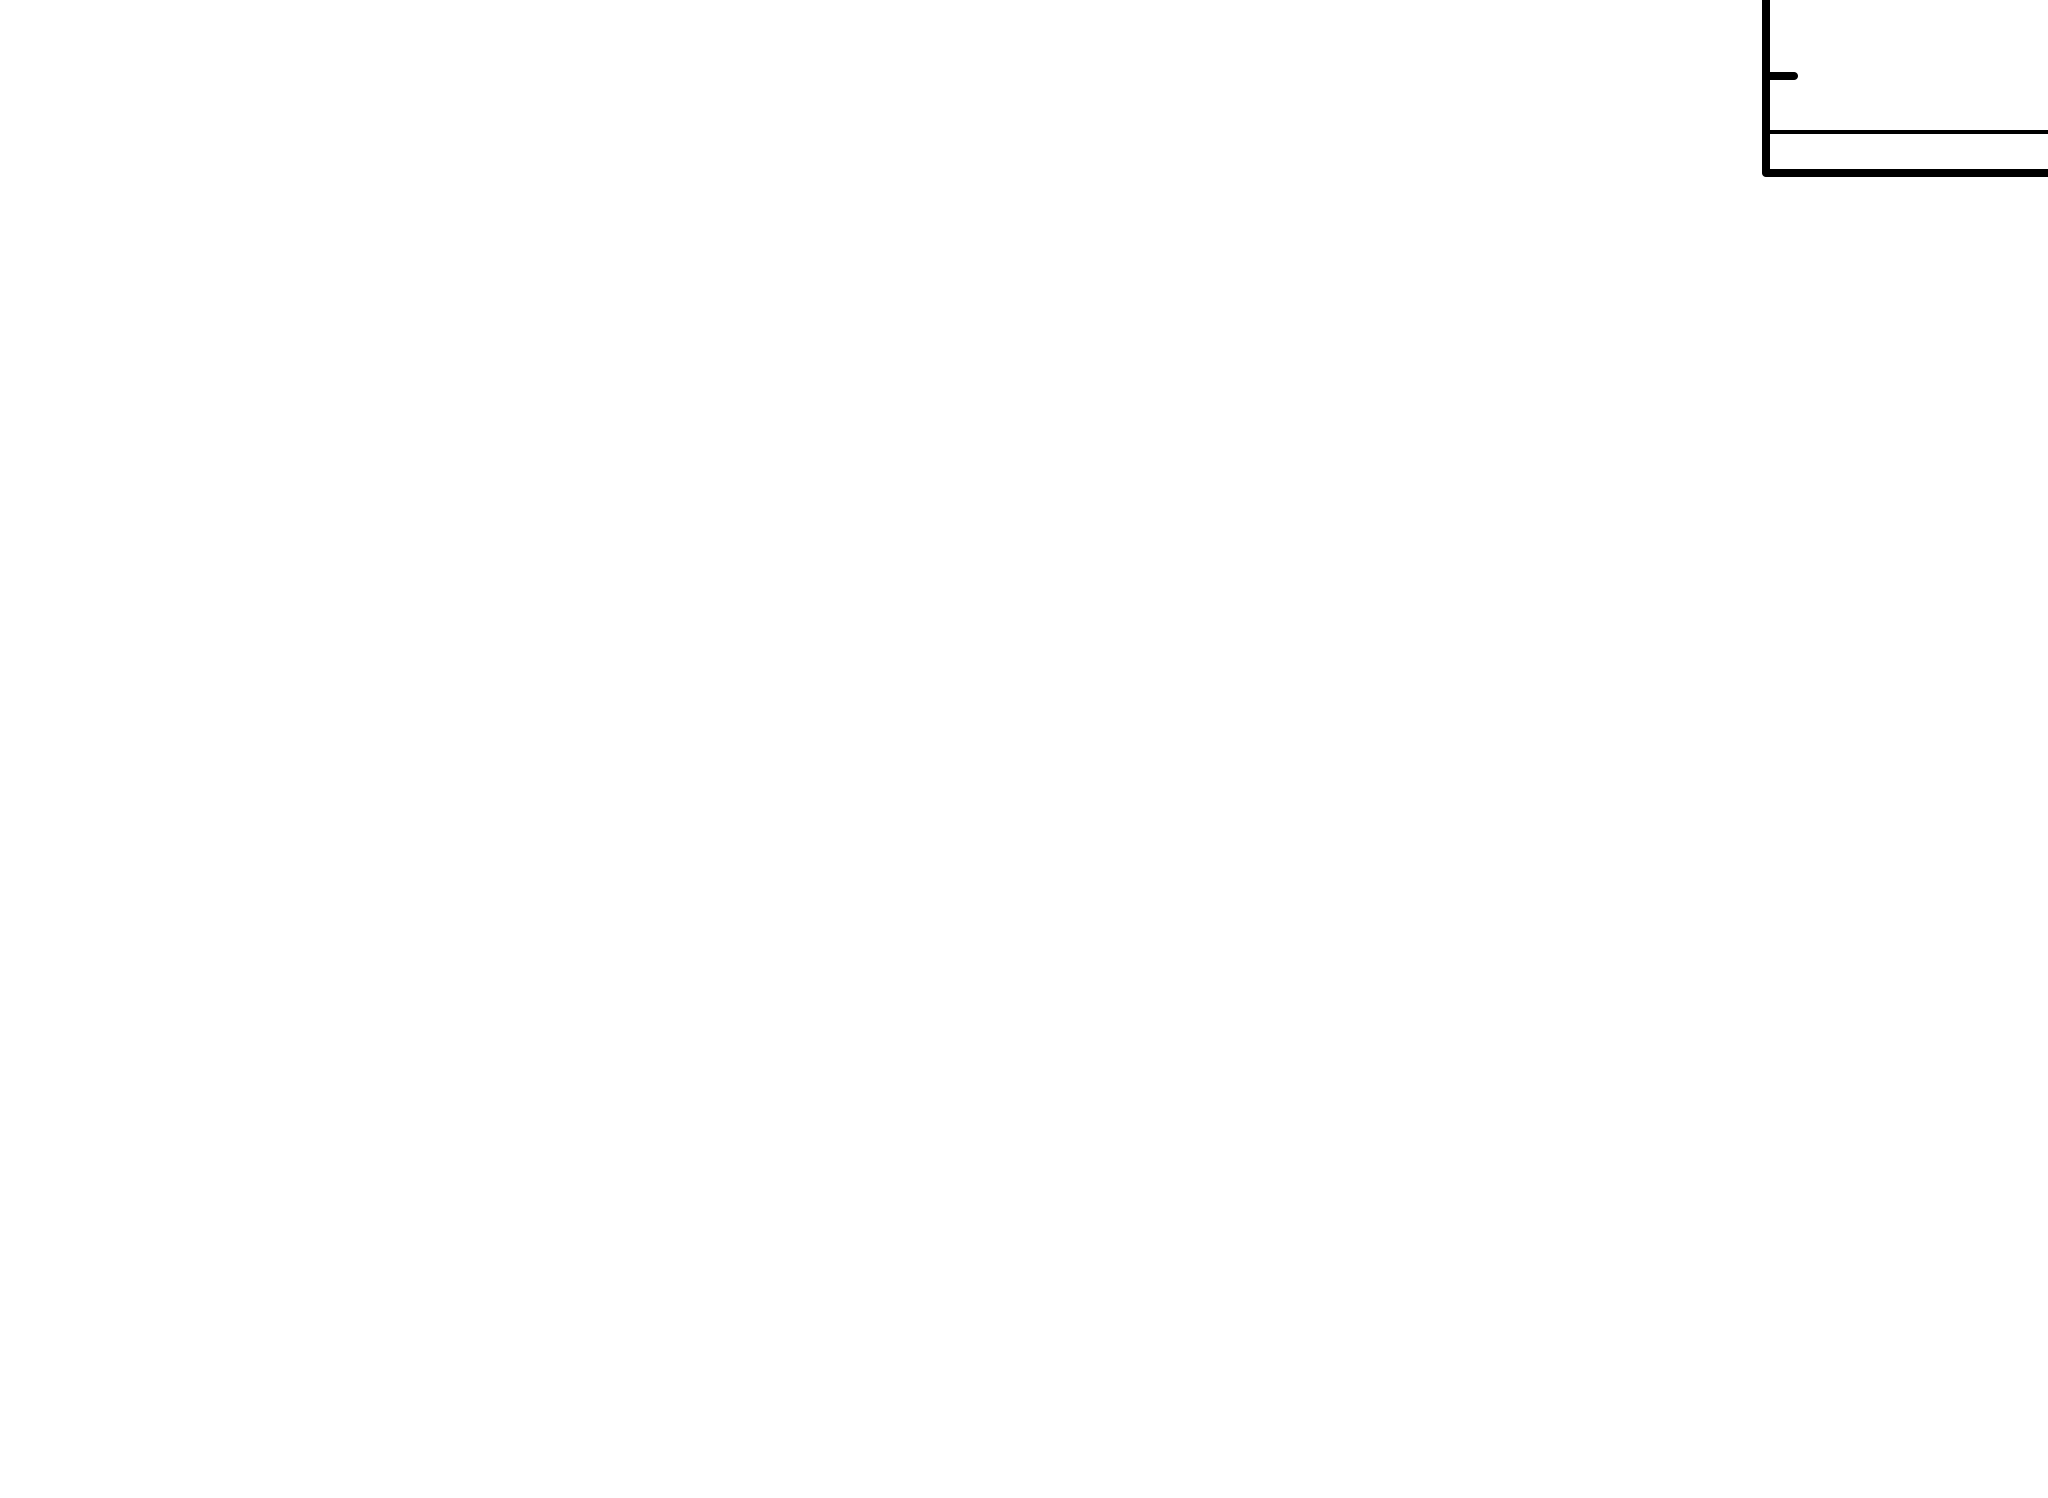

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.401995      5.48116    (-1.83095,3.24822)
 Parameter   Confidence Range (2.706)
     2     0.409649      3.95623    (-1.42297,2.12361)



Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.771338e+10     using 5 bins.

Test statistic : Chi-Squared              3.771338e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
3.69924      1.63023      -3       1.76426       10.7287   3.69667e-05
3.63614      8595.43      -4       2.01591       8.25701   4.10931e-05
3.62206      5248.15      -5       1.91287       9.87800   3.94072e-05
3.6

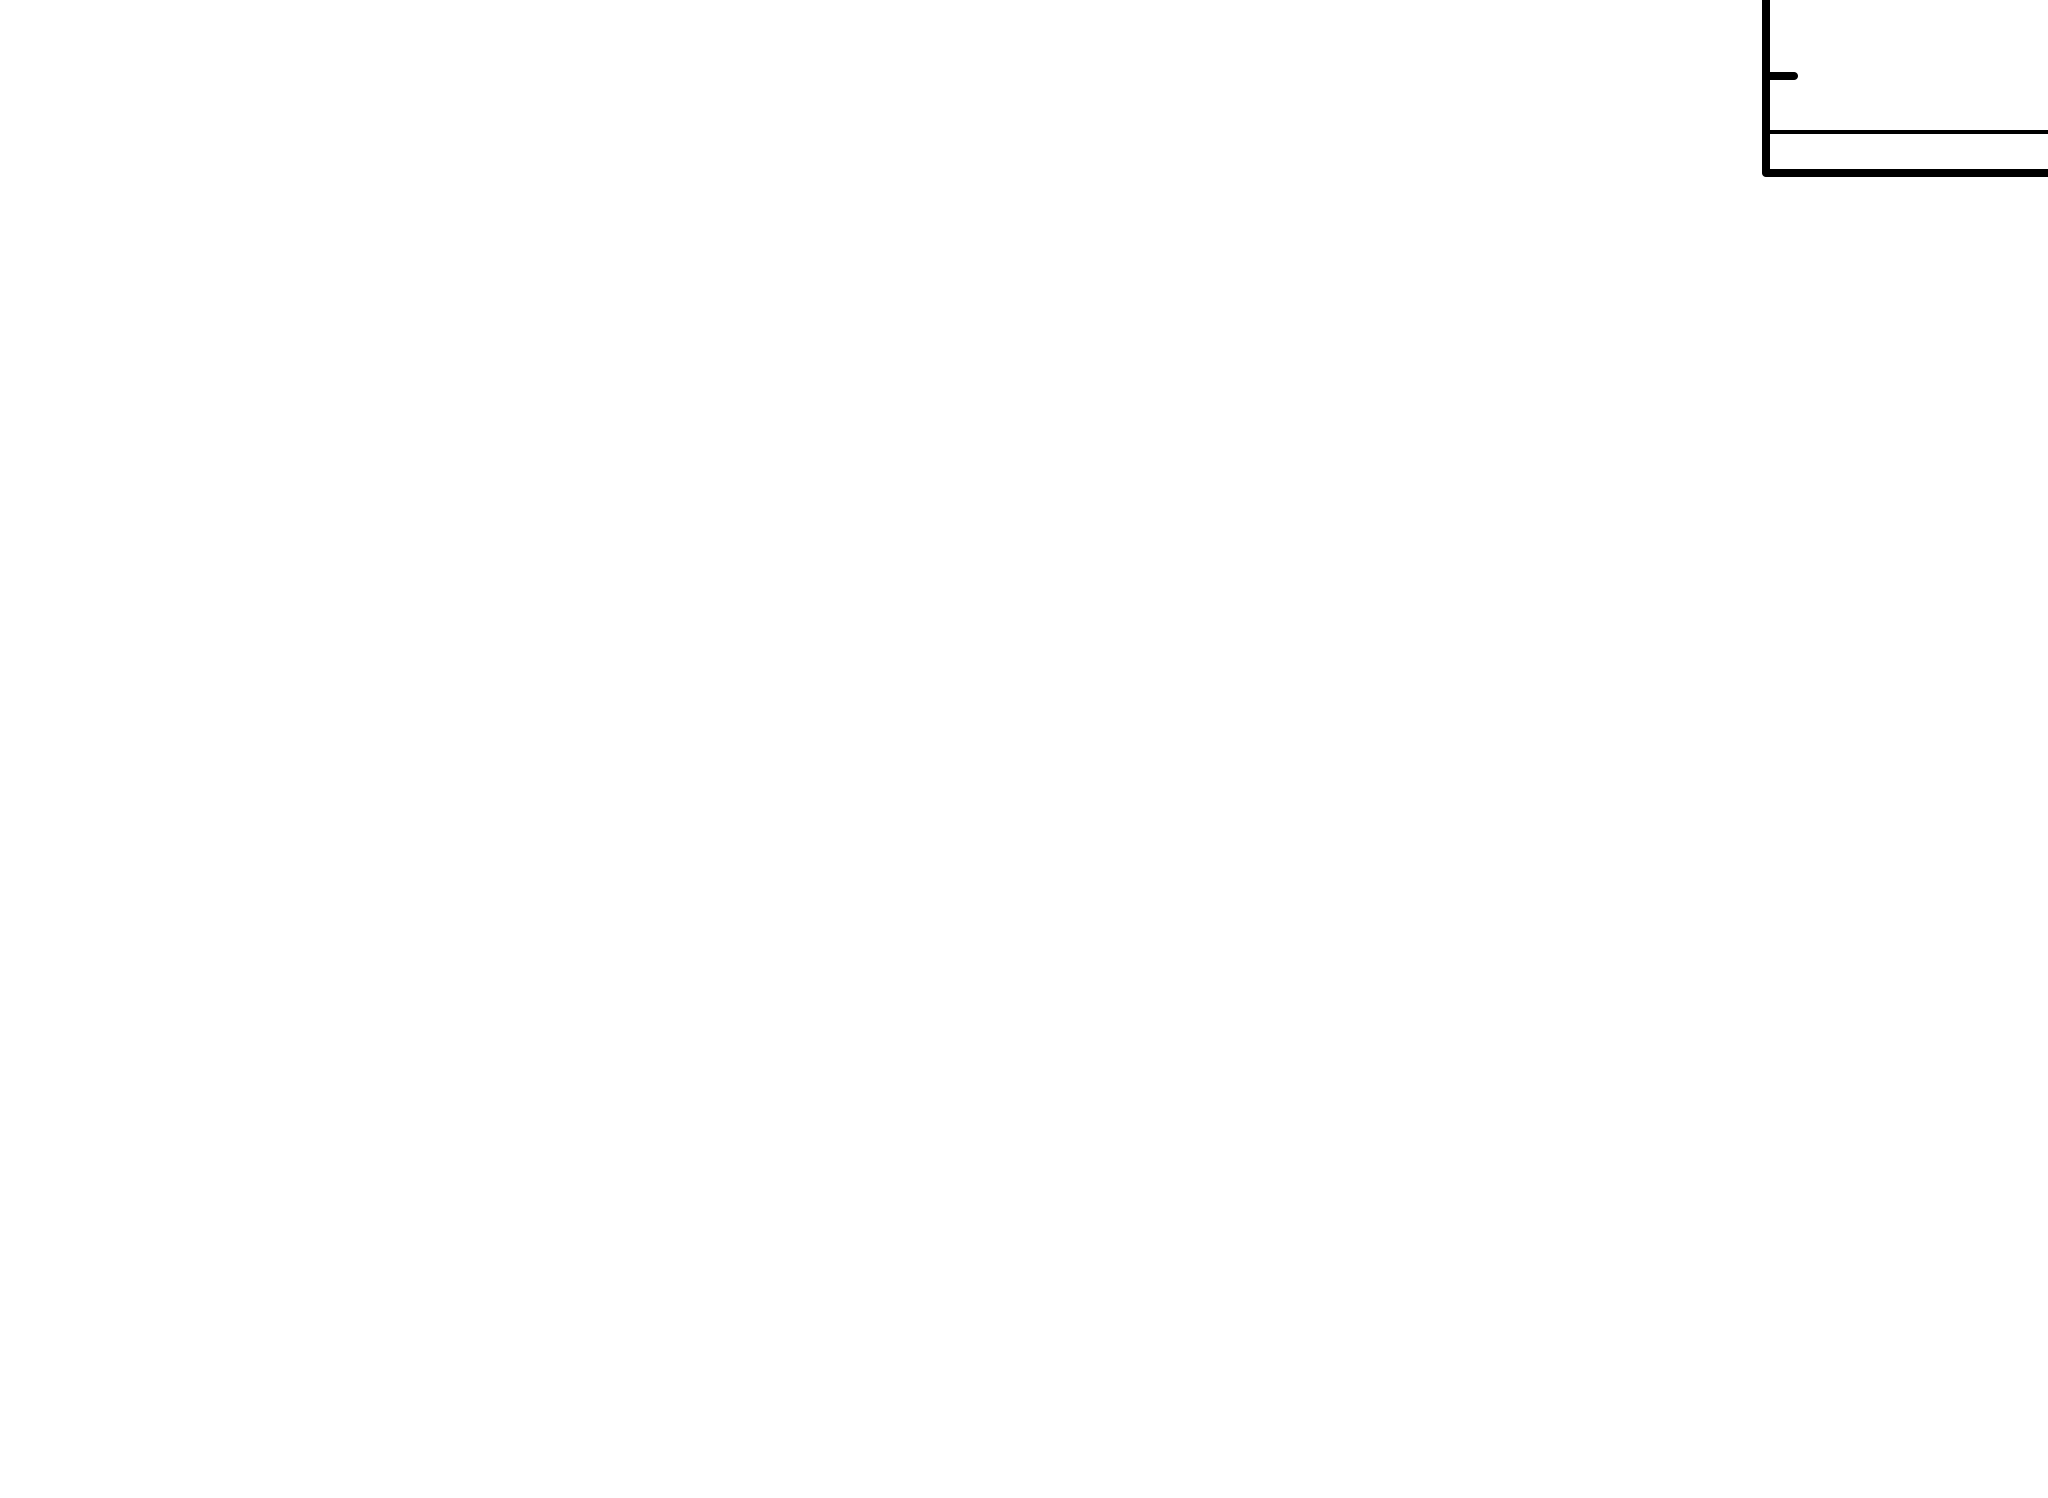

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
Apparent non-monotonicity in statistic space detected.
Current bracket values 0.79277, 0.79274
and delta stat 2.51885, 2.97444
but latest trial 0.792741 gives 2.97444
Suggest that you check this result using the steppar command.
     1     0.792755      4.46504    (-1.16506,2.50723)
 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 1
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 1 is pegged at 1.95781 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
 Parameter 3 is pegged at 4.04454e-05 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.

 Fit error occurred during lower bound error calculation.

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 200, with delta statistic: 0.359193

Continue error search in this direction? 
*** Paramete


***XSPEC Error:  No variable parameters for fit 


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.725762e+09     using 5 bins.

Test statistic : Chi-Squared              6.725762e+09     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
10.6753      1.62149      -3       4.55949       3.46375   0.0

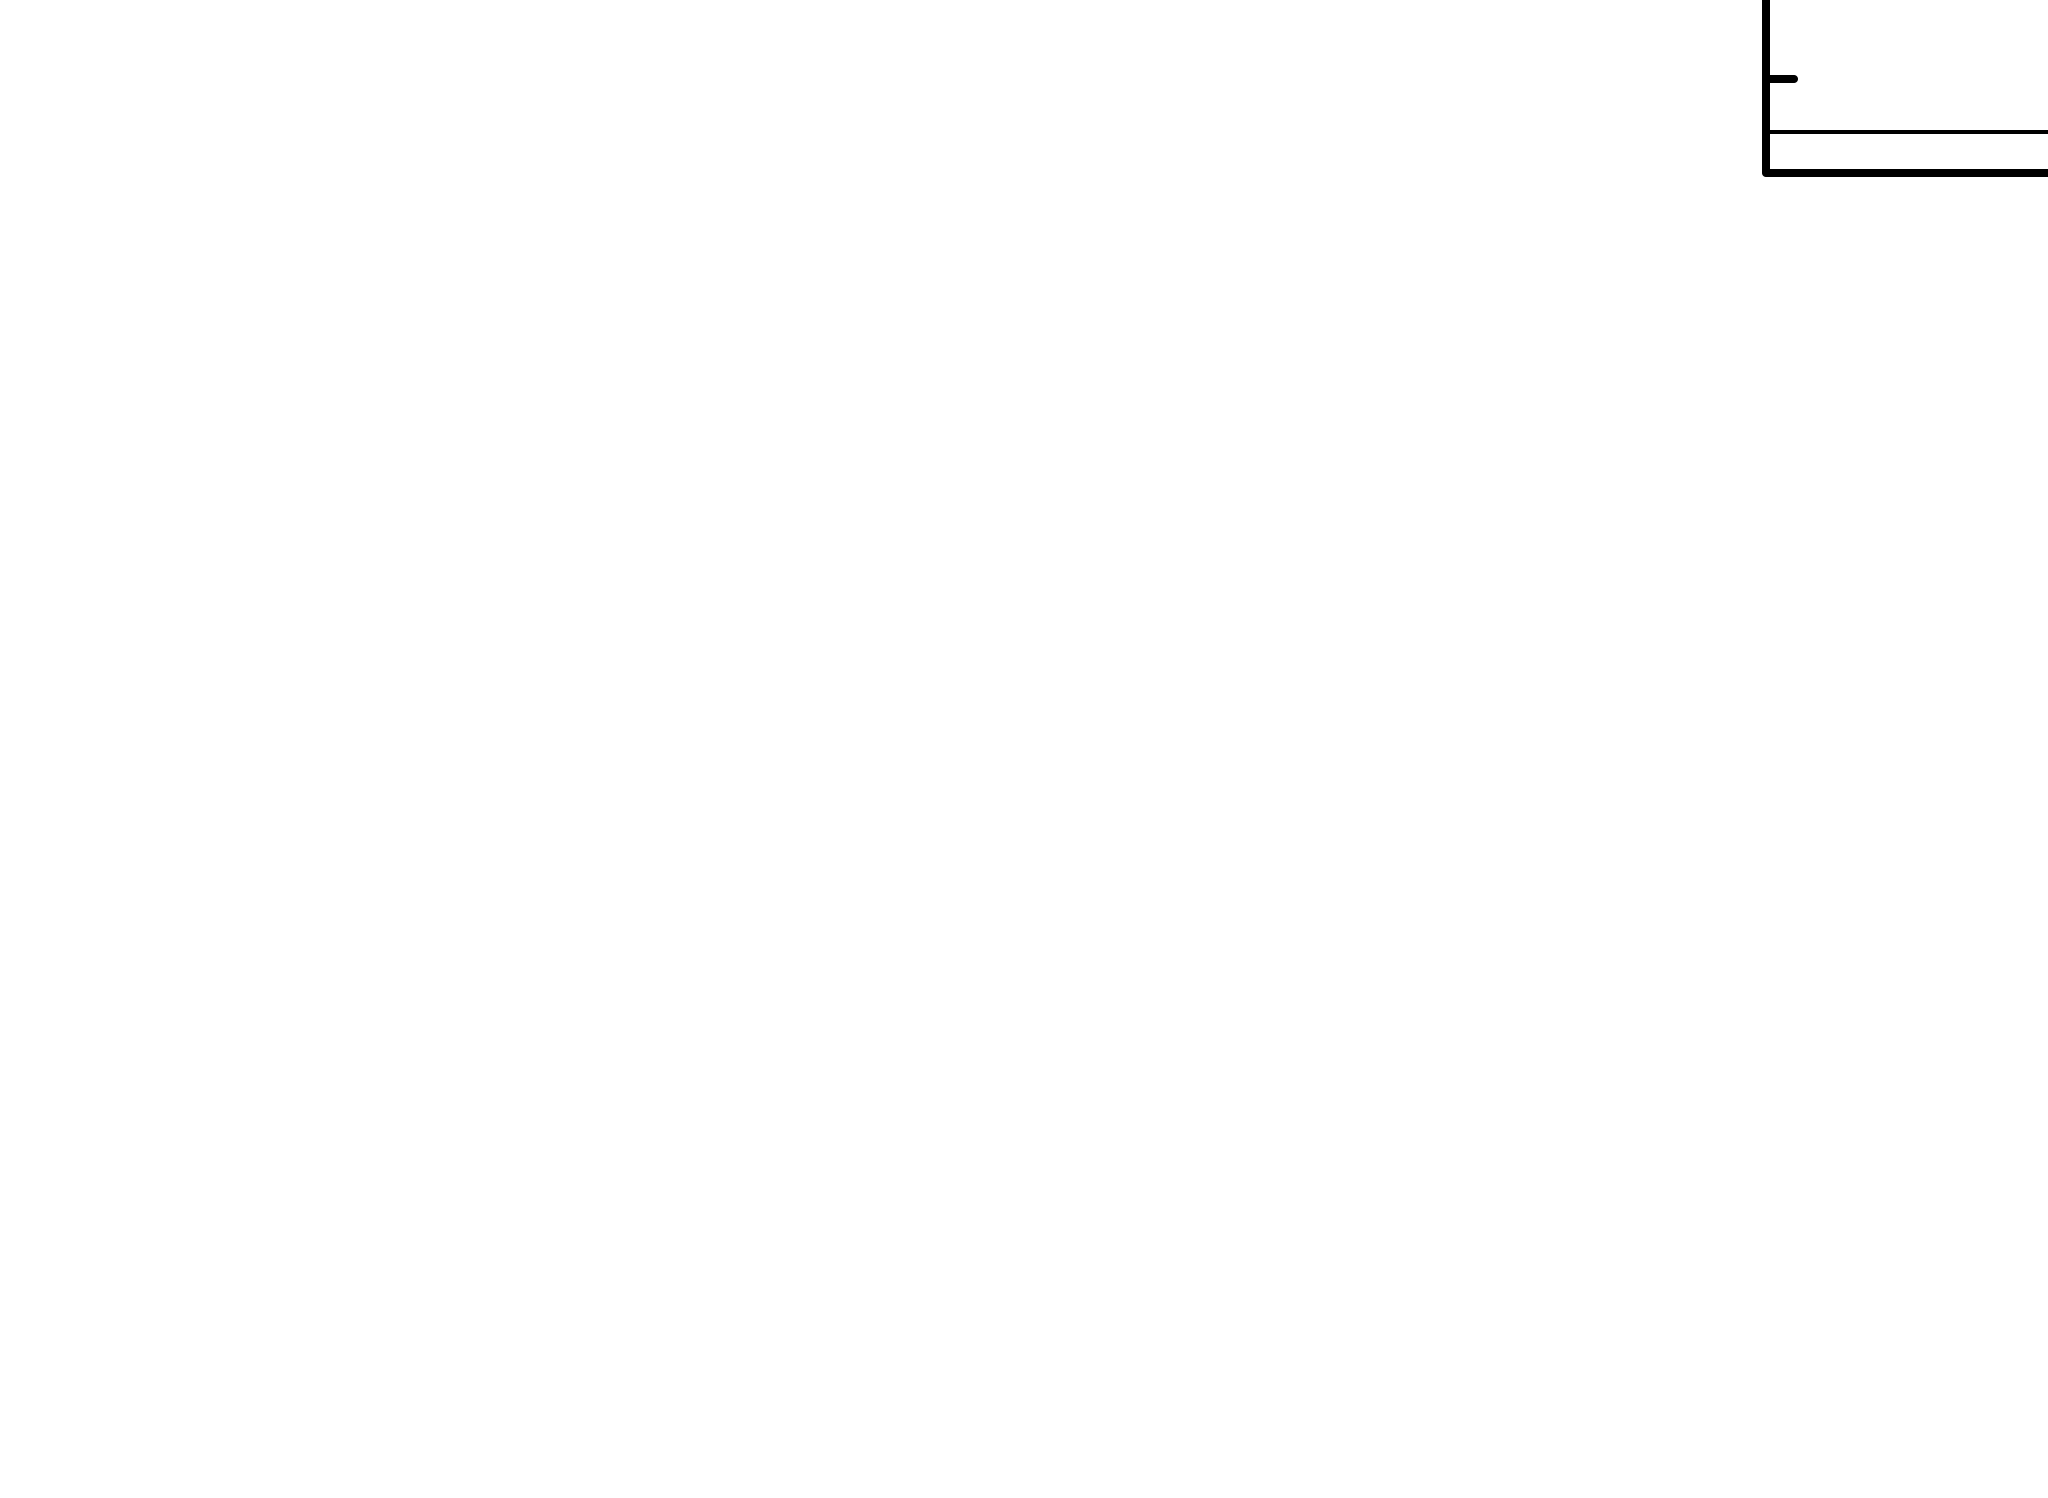

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.836229      4.69026    (-1.31516,2.53887)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 64
     2      1.70781            0    (-3.9354,-5.64322)


In [12]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.9924e-05 photons (1.3835e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [13]:
#plx = 1.8289
d_kpc = 8
F_x = 1.3839*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.0594151181981696e+33


In [14]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.02506616616725


In [15]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.3999154102579904



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.725762e+09     using 5 bins.

Test statistic : Chi-Squared              6.725762e+09     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.422203e+09     using 5 bins.

Test statistic : Chi-Squared              1.422203e+09     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees o

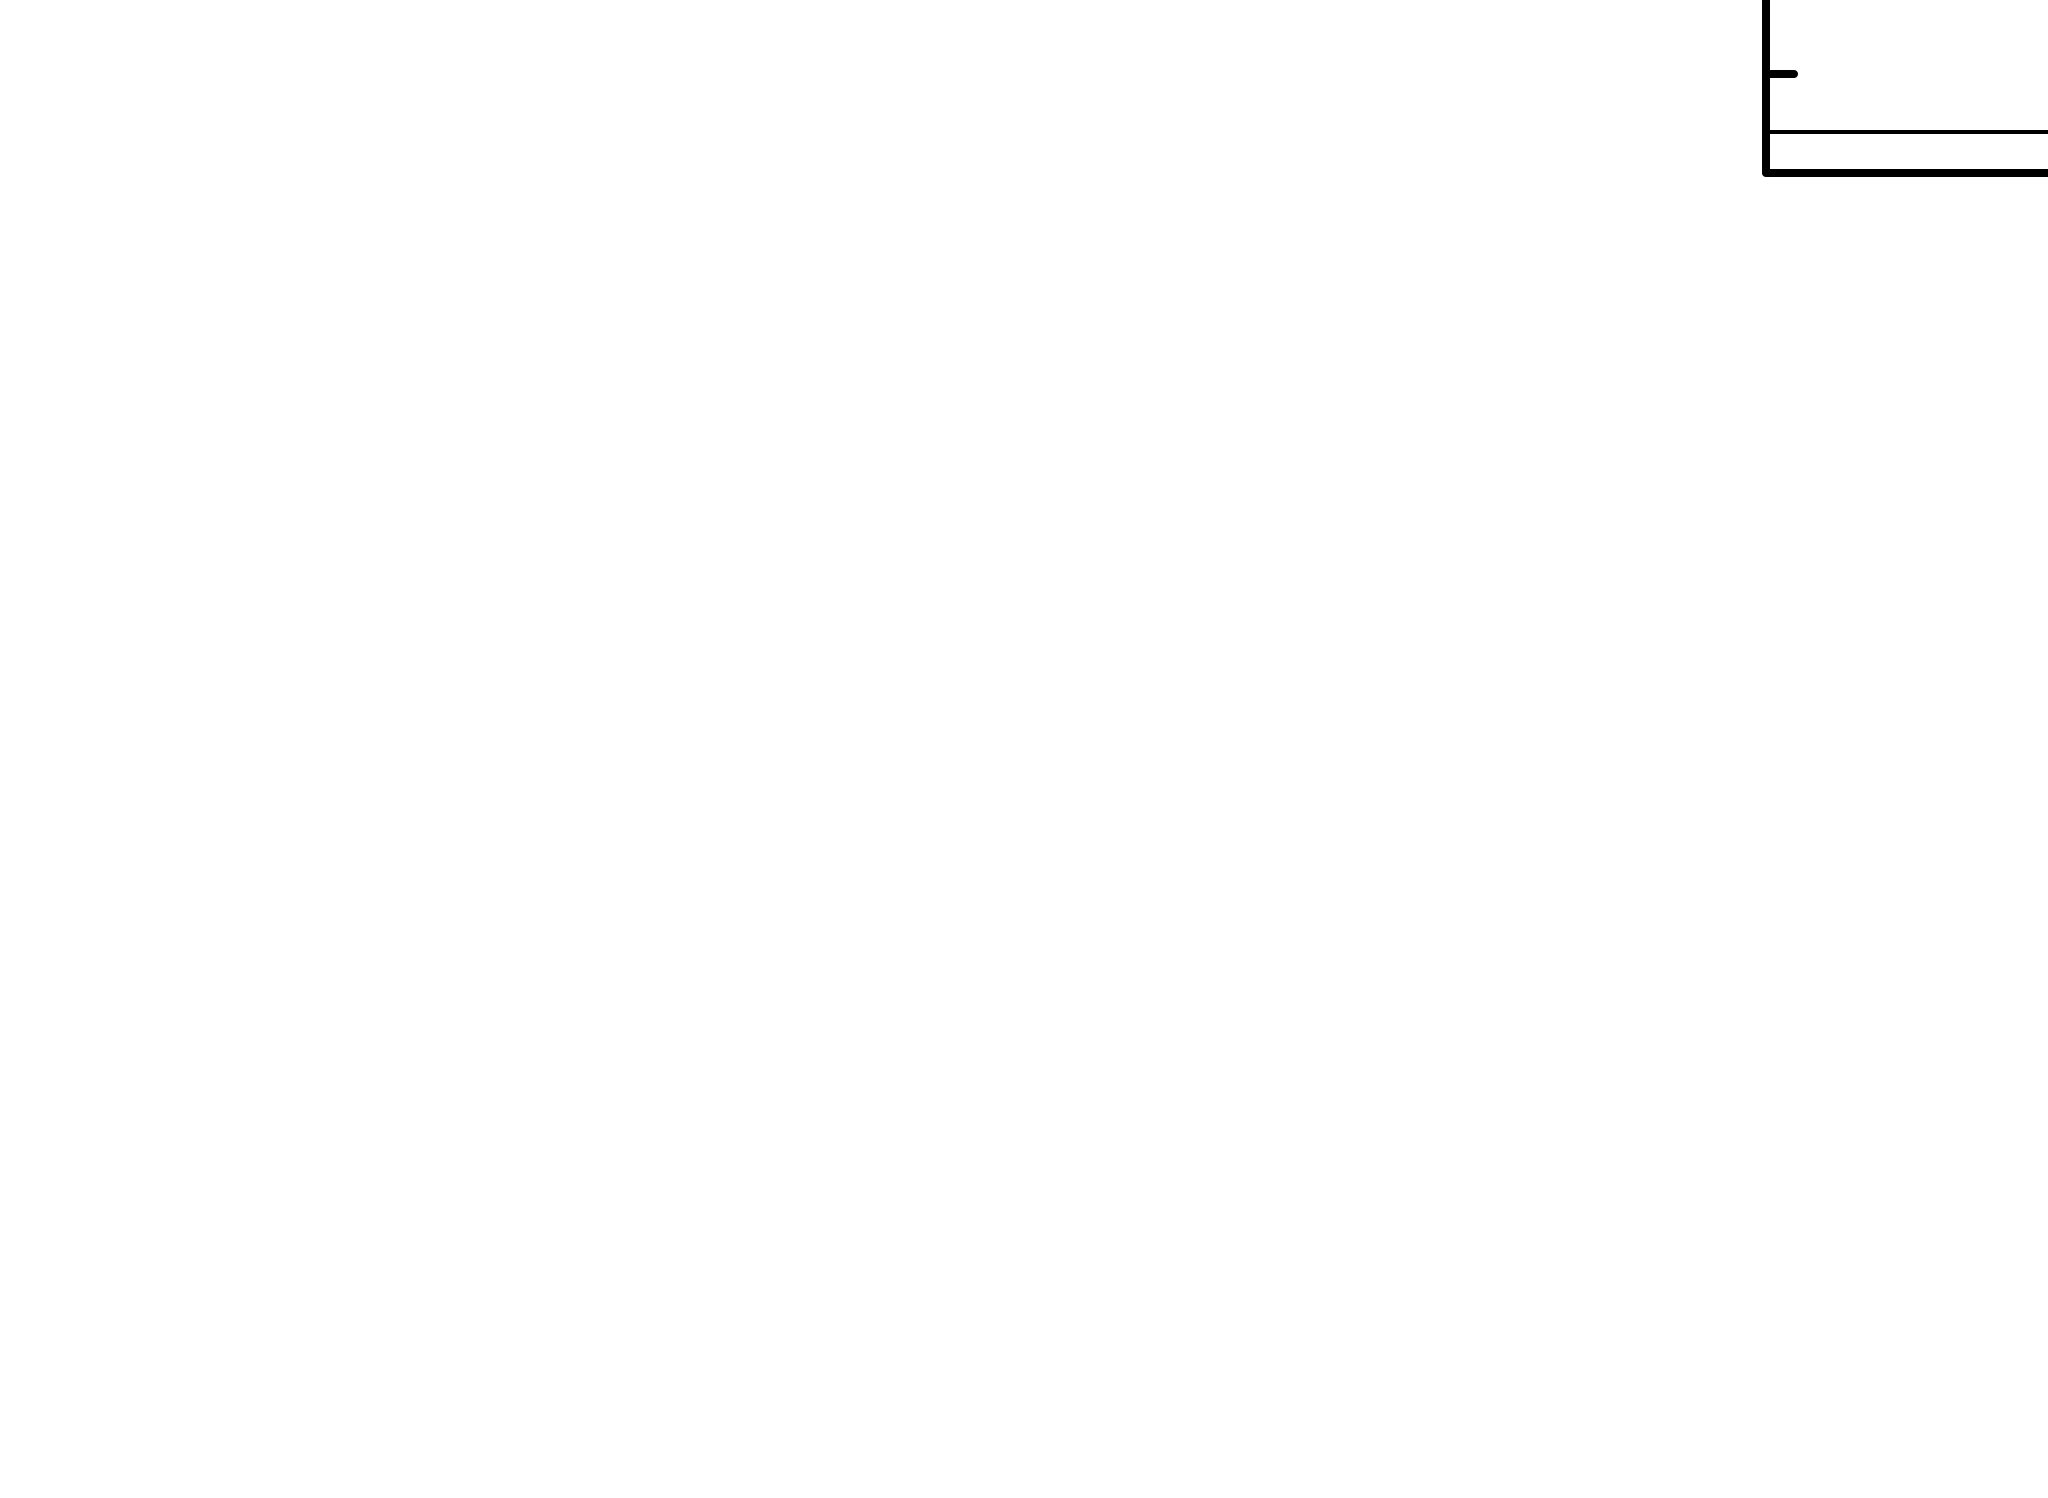

In [16]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.Abundanc = 0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.303502e+09     using 5 bins.

Test statistic : Chi-Squared              5.303502e+09     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.190934e+09     using 5 bins.

Test statistic : Chi-Squared              1.190934e+09     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degree

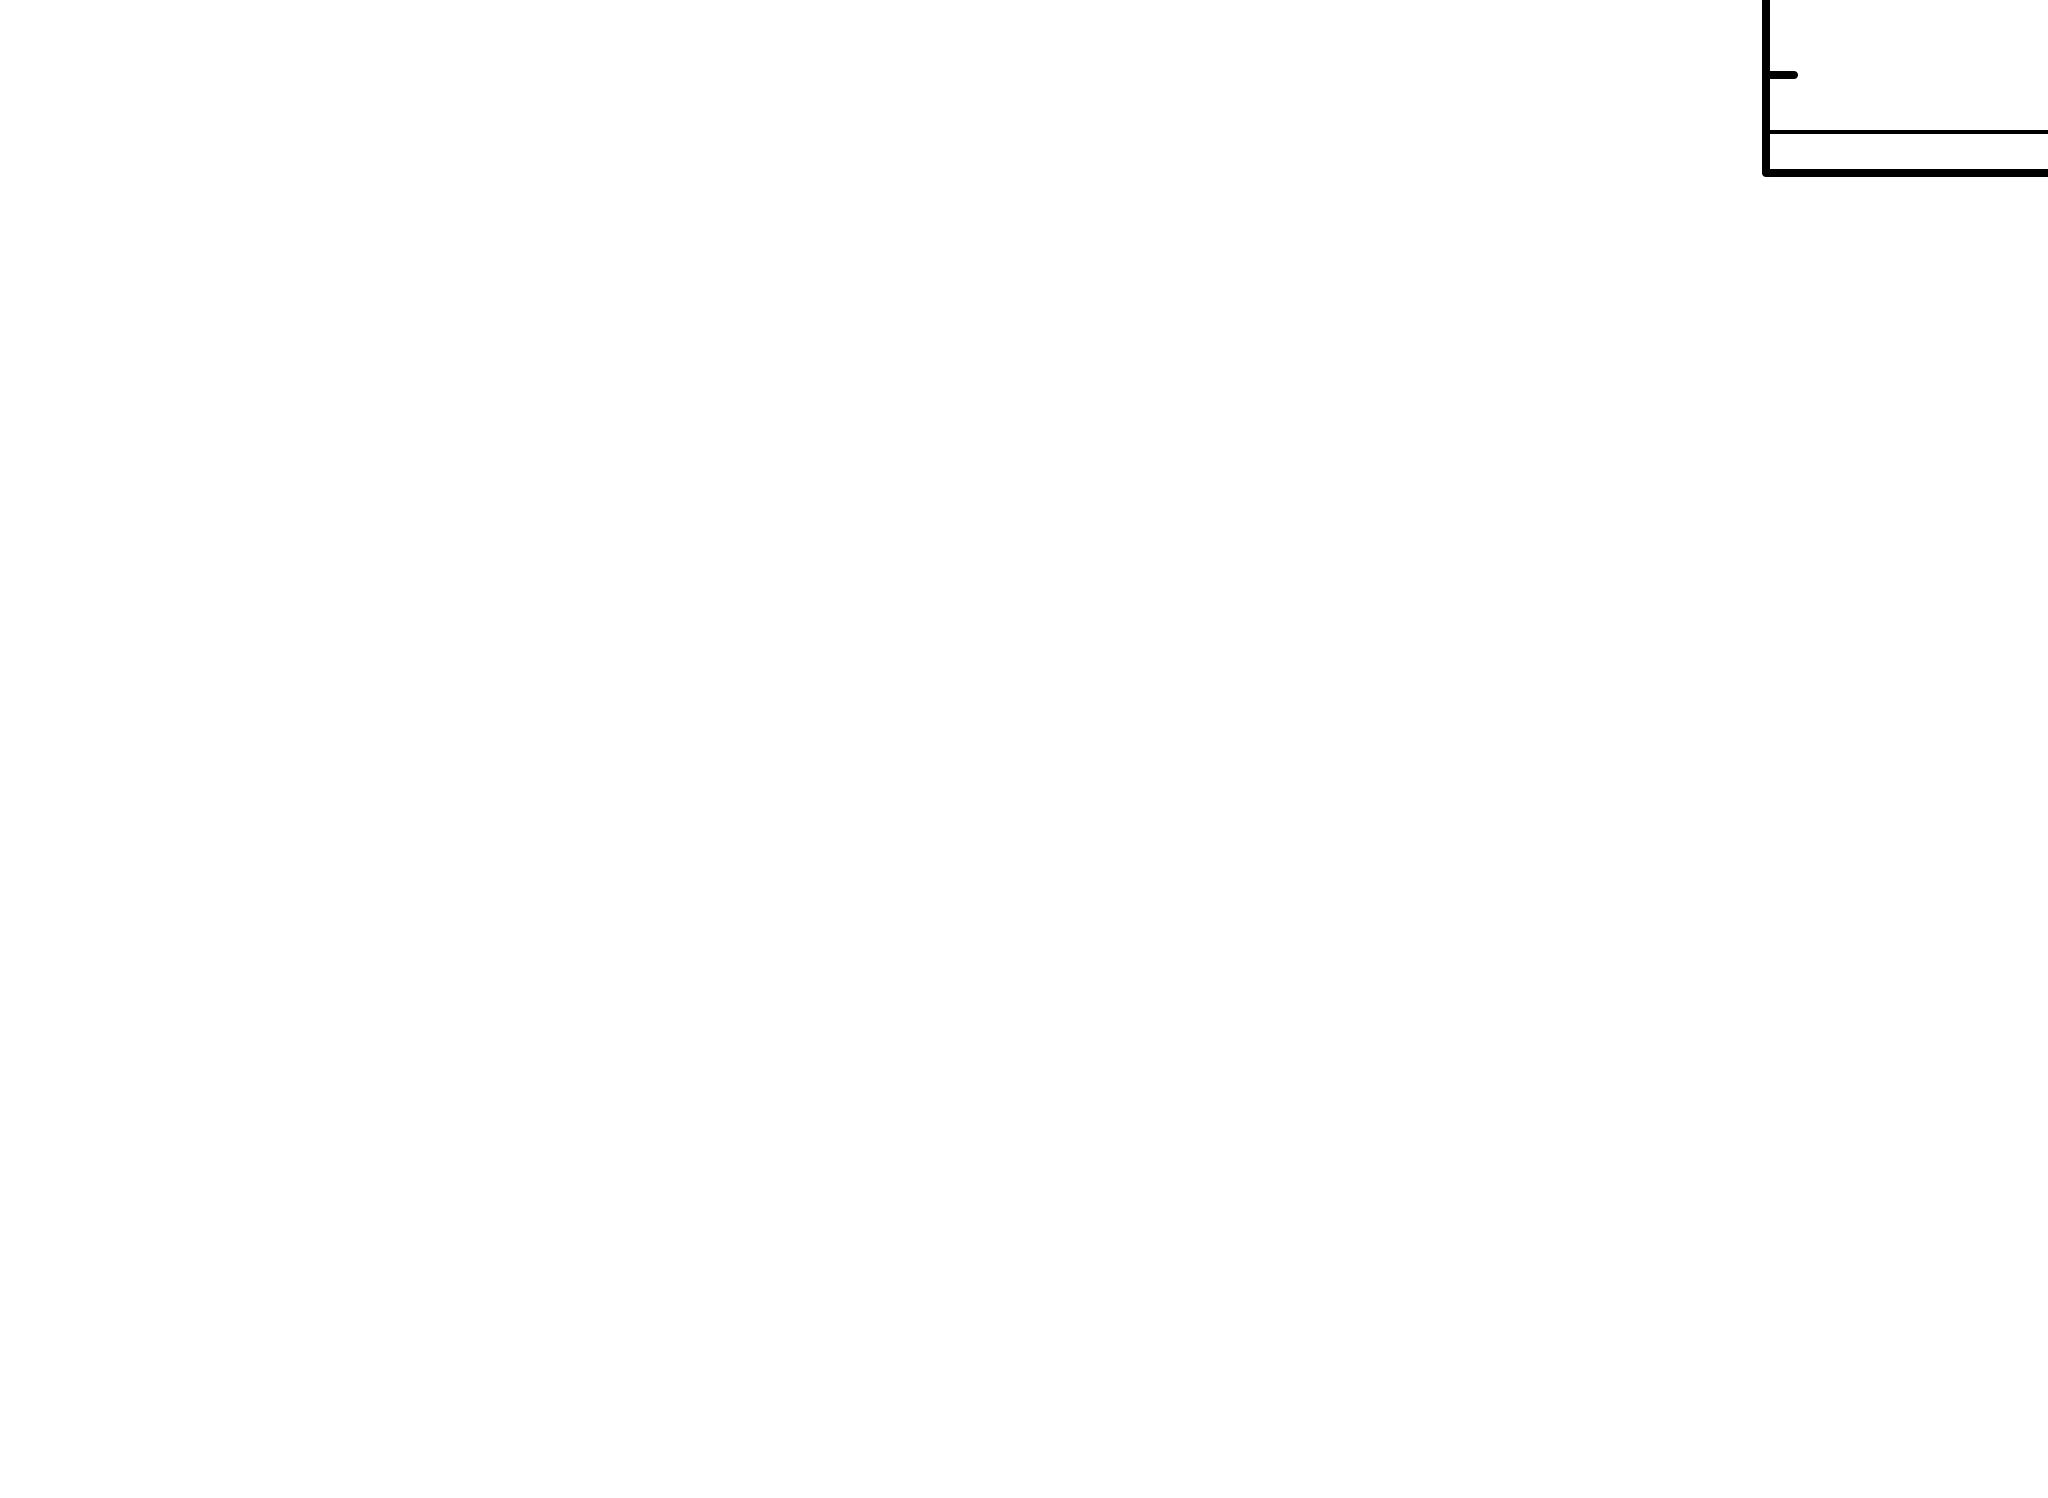

In [17]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc = 0.3
Fit.perform()
Plot("data resid")

In [18]:
Fit.error("1")
Fit.error("2")

out_arr[4,0] = 'raymond'
out_arr[4,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[4,13] = mo.raymond.Abundanc.values[0]
out_arr[4,4:7] = mo.raymond.kT.values[0], mo.raymond.kT.values[0] - mo.raymond.kT.error[0], mo.raymond.kT.error[1] - mo.raymond.kT.values[0]
out_arr[4,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.823497      4.53679    (-1.16262,2.55068)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 64
     2      1.67092            0    (-6.67006,-8.34098)


In [19]:
np.savetxt('spec18_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')
